# Tüfe ile konut fiyat endeksi ve toplam konut satışları arasındaki ilişkinin analizi


### Gerekli kütüphanelerin çağırılması 


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats

### Merkez bankasından aldığımız verinin okunması


In [88]:
df1 = pd.read_excel('EVDS.xlsx')

In [89]:
df1

,Tarih,TP AKONUTSAT1 TOPLAM,TP FE OKTG01,TP HKFE01
0,2009-10,NaN,167.88,NaN
1,2009-11,NaN,170.01,NaN
2,2009-12,NaN,170.91,NaN
3,2010-01,NaN,174.07,45.4
4,2010-02,NaN,176.59,45.6
...,...,...,...,...
146,2021-12,226503.0,686.95,247.4
147,2022-01,88306.0,763.23,279.9
148,2022-02,97587.0,799.93,317.6
149,2022-03,134170.0,843.64,NaN


### Elimizdeki  verileri temizleme

Burada işimize yaramayan tarih sütununu kaldırıyoruz ve sayı olmayan değerleri temizliyoruz. Ayrıca rahat okunabilirlik adına sütun adlarını teknik terimlerden daha rahat okunabilir isimlere çeviriyorum

In [90]:
df2 = df1.dropna()
df2 = df2.drop('Tarih', 1)

df2.rename(columns={'TP AKONUTSAT1 TOPLAM':'Toplam Konut Satışı', 'TP FE OKTG01':'Tüketici Fiyat Endeksi', 'TP HKFE01':'Konut Fiyat Endeksi'}, inplace=True)

df2

C:\Users\PC\AppData\Local\Temp/ipykernel_4936/3122792065.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('Tarih', 1)


,Toplam Konut Satışı,Tüketici Fiyat Endeksi,Konut Fiyat Endeksi
39,87444.0,216.74,56.9
40,88519.0,217.39,57.6
41,97956.0,218.83,58.4
42,95381.0,219.75,59.2
43,103261.0,220.07,60.0
...,...,...,...
144,137401.0,584.32,210.2
145,178814.0,604.84,229.2
146,226503.0,686.95,247.4
147,88306.0,763.23,279.9


### Regresyon modelinde bağımlı ve bağımsız değişkenleri belirleme

In [100]:
x = df2.drop(['Tüketici Fiyat Endeksi'], axis=1).values
y = df2['Tüketici Fiyat Endeksi'].values

### Eğitim ve test verilerini ayırma

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Regresyon modelinin kurulması

In [102]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### Test sonuçlarının tahmin edilmesi

In [103]:
y_pred = reg.predict(x_test)
print(y_pred)

[393.56969761 232.60494531 357.6327515  219.98915788 264.16496302
 544.28887166 919.72270851 230.10077373 245.5342791  442.76450897
 349.53989315 257.0269606  310.55713106 343.47319712 360.59705312
 329.33789339 239.25242414 358.02288796 399.46317629 331.31661648
 624.65565349 229.14759808 266.78000433 471.31392636 284.79008032
 222.48182307 354.03521586 320.4691945  280.09280776 226.42451569
 365.20330943 427.03975605 373.21541205]


In [104]:
reg.predict([[87444	,56.9]])

array([217.30004207])

Yukarıda gördüğünüz gibi, X1 ve X2 değişkenlerimizi reg.predict() fonksiyonumuza girdiğimzde çıkan sonuç dataframe'imizdeki Y değerine çok yakın. Kendiniz de görmek için farklı X1 ve X2 değerleriyle test edebilirsiniz

### Modelin güvenilirlik seviyesi

In [105]:
r2_score(y_test, y_pred)

0.9222644987301071

Modelimizin güvenilirlik seviyesi yukarıdaki testimizden de belli olduğu üzere oldukça yüksek: %92.

### Sonuçları görselleştirme

Text(0, 0.5, 'Tahmin')

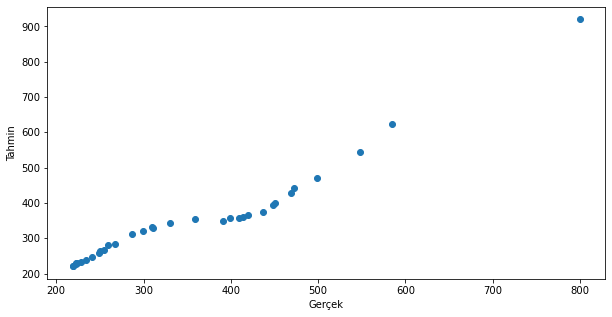

In [106]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek')
plt.ylabel('Tahmin')


### Tahmin değerlerimizin gerçek değerlerden ne kadar saptığını gösteren bir dataframe

In [109]:
pred_y_df=pd.DataFrame({'Gerçek Değer':y_test, 'Tahmin Değeri':y_pred, 'Fark':abs(y_test-y_pred)})

pred_y_df

,Gerçek Değer,Tahmin Değeri,Fark
0,448.02,393.569698,54.450302
1,227.96,232.604945,4.644945
2,409.63,357.632752,51.997248
3,218.83,219.989158,1.159158
4,250.45,264.164963,13.714963
5,547.48,544.288872,3.191128
6,799.93,919.722709,119.792709
7,222.21,230.100774,7.890774
8,241.32,245.534279,4.214279
9,472.61,442.764509,29.845491


YARARLANDIĞIM KAYNAKLAR:


https://towardsdatascience.com/five-regression-python-modules-that-every-data-scientist-must-know-a4e03a886853


https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

https://www.analyticsvidhya.com/blog/2022/02/linear-regression-with-python-implementation/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html